In [5]:
# 환경 설정 
!python --version
!pip list |findstr opencv

Python 3.9.7
opencv-python       4.5.5.62


In [6]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [10]:
!pip install opencv-python
!pip install opencv-contrib-python==4.5.2.52 --user
!pip install opencv-python-headless==4.5.2.52 --user

In [3]:
!pip install numpy
!pip install cmake
!pip install dlib

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


  Using cached cmake-3.22.1-py2.py3-none-win_amd64.whl (38.1 MB)
  Using cached dlib-19.22.1-cp39-cp39-win_amd64.whl


In [8]:
!pip install matplotlib

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [15]:
# Step1. 고양이 수염 이미지 다운로드하기 
!pip install wget
# 오른쪽 url에서 고양이 수염 이미지 다운로드 : "https://cdn-icons-png.flaticon.com/512/24/24674.png"
# 내 얼굴 사진은 my_face.jpg, my_face2.jpg로 저장함.

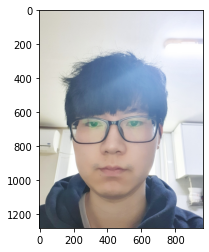

In [17]:
#Step 2. 얼굴 검출 & 랜드마크 검출 하기

# 내 얼굴 사진 확인하기 
my_image_path = './my_face2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

#rgb로 전황
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [18]:
#얼굴 검출하기 
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(171, 542) (726, 1096)]]


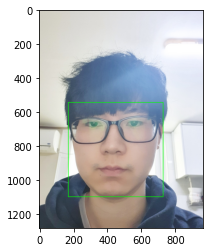

In [19]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [20]:
# 랜드마크 검출하기 
# "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2" 에서 랜트마클 모델 다운로드 

model_path = "./shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

SyntaxError: invalid syntax (Temp/ipykernel_19976/3870084678.py, line 3)